In [65]:
%matplotlib notebook
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mwapy.pb import beam_full_EE

In [79]:
tile = beam_full_EE.ApertureArray('/data4/beards/code/MWA_Tools/mwapy/data/mwa_full_embedded_element_pattern.h5',
                                  140e6)
mybeam = beam_full_EE.Beam(tile, np.zeros((2, 16)), np.ones((2, 16)))

In [67]:
# Set up healpy map
nside = 64
inds = np.arange(hp.nside2npix(nside))
theta, phi = hp.pix2ang(nside, inds)

In [68]:
beam_full = mybeam.get_response(phi, theta)

# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!


<IPython.core.display.Javascript object>


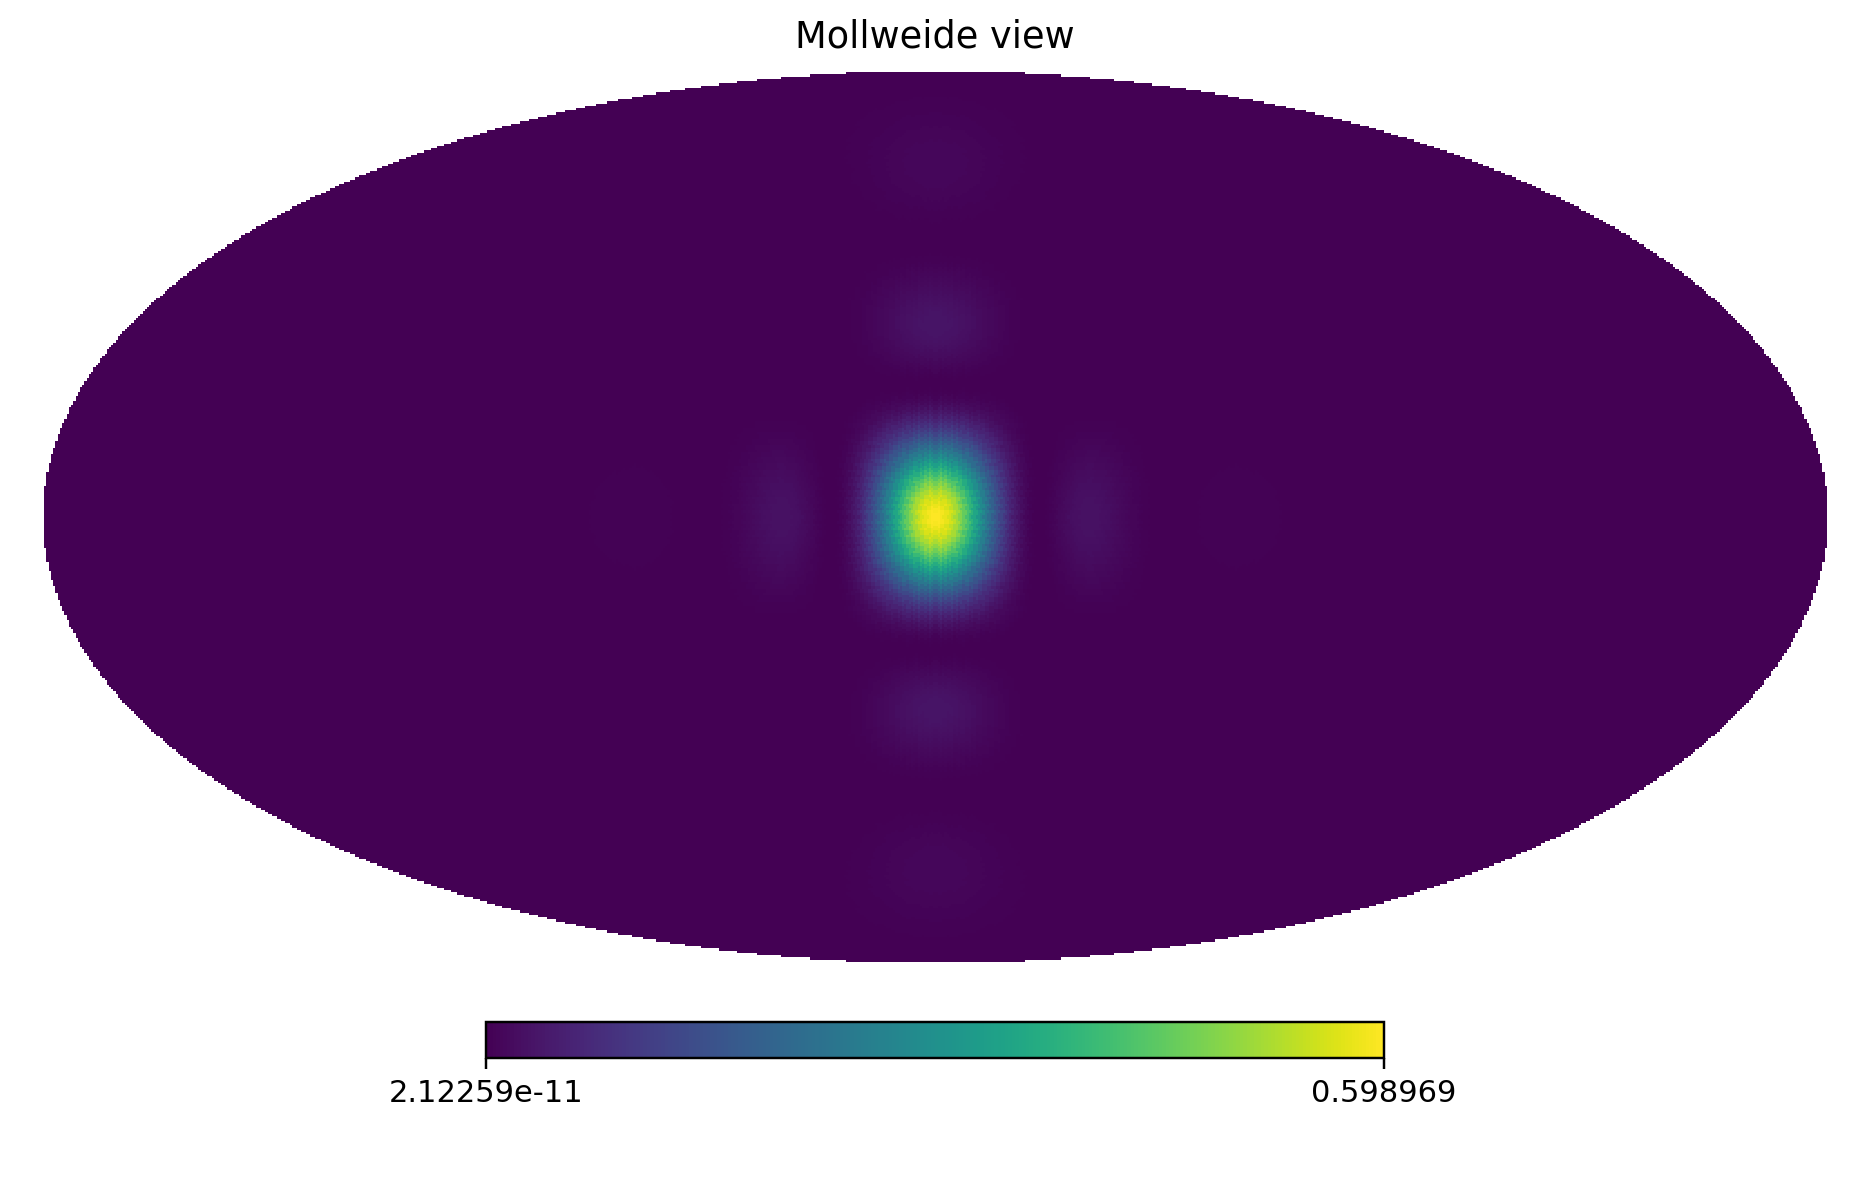

In [69]:
hp.mollview(np.abs(beam_full[0, 0, :])**2 + np.abs(beam_full[0, 1, :])**2, rot=[0, 90])

In [80]:
# Make array of beams with different single dipoles
beams = np.zeros((16, hp.nside2npix(nside)))
for i in range(16):
    amps = np.zeros((2, 16))
    amps[:, i] = 1
    mybeam = beam_full_EE.Beam(tile, np.zeros((2, 16)), amps)
    b = mybeam.get_response(phi, theta)
    beams[i, :] = np.abs(b[0, 0])**2 + np.abs(b[0, 1])**2

# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152

<IPython.core.display.Javascript object>


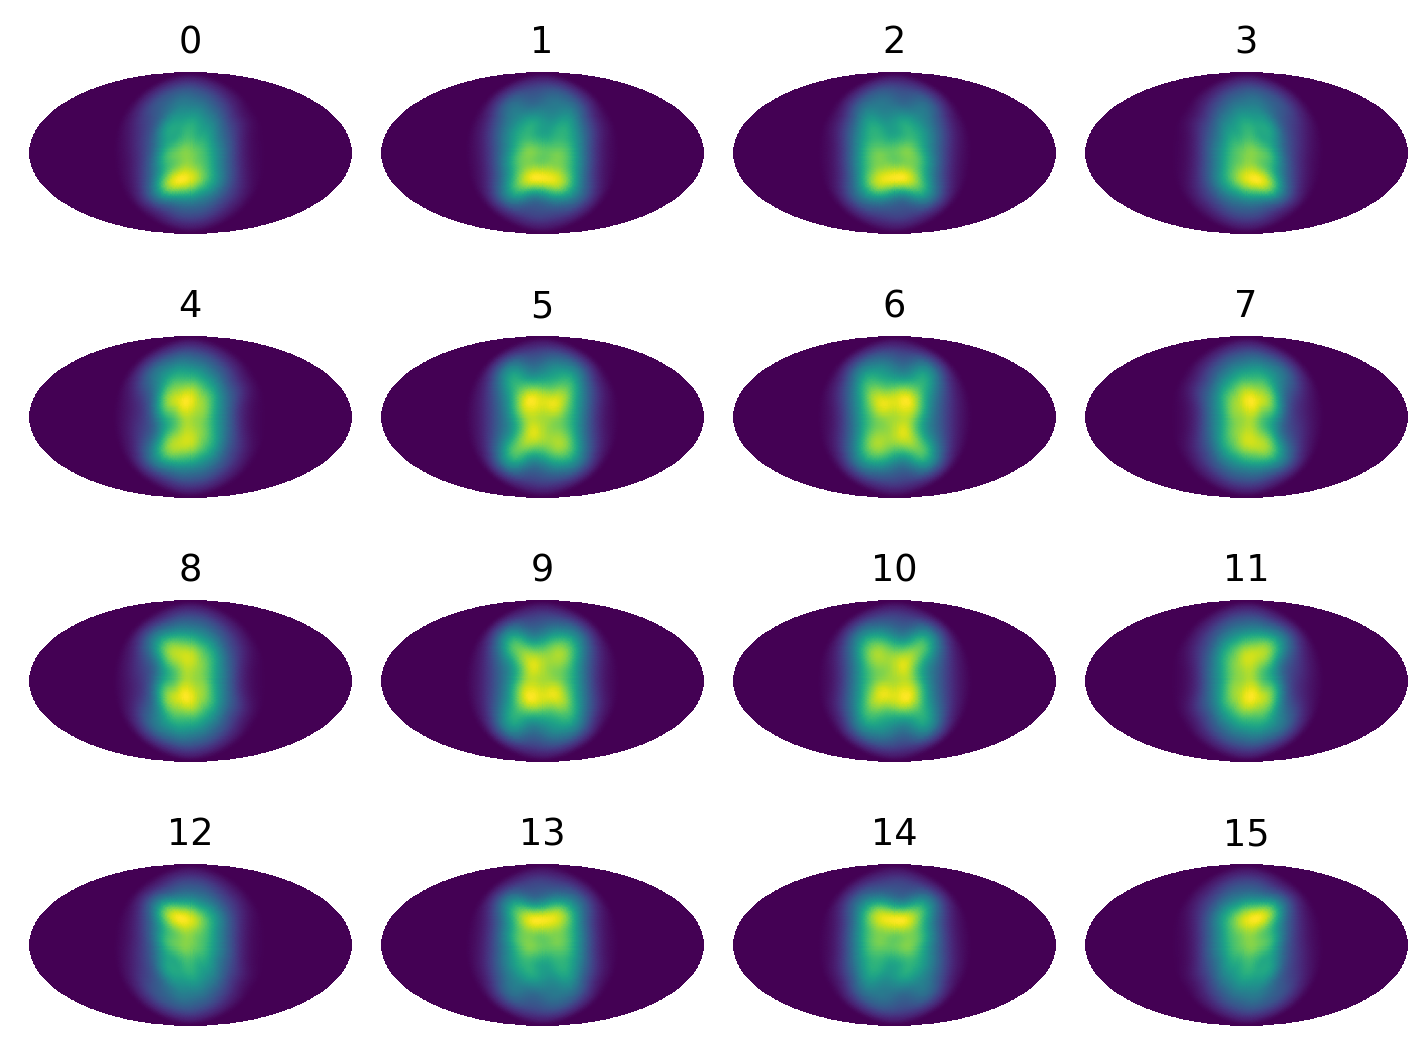

In [57]:
f = plt.figure()
for i in range(16):
    hp.mollview(beams[i, :], rot=[0, 90], fig=f, sub=(4, 4, i + 1), title=str(i), cbar=False)

<IPython.core.display.Javascript object>


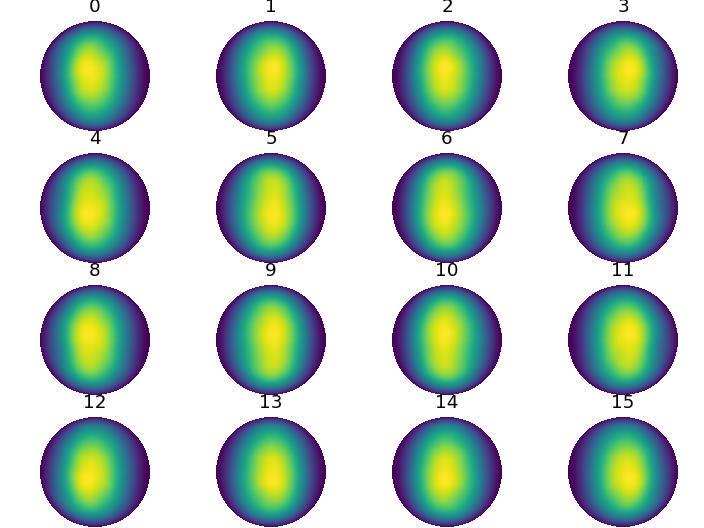

In [81]:
f = plt.figure()
for i in range(16):
    hp.orthview(beams[i, :], rot=[0, 90], fig=f, sub=(4, 4, i + 1), title=str(i), cbar=False, half_sky=True)